### Instalaciones

In [1]:
!pip install mediapipe
!pip install opencv-python
!pip install matplotlib

### Imports

In [2]:
import cv2
import mediapipe as mp
import math
from matplotlib import pyplot as plt


In [3]:
NOSE = 0
LEFT_EYE_INNER = 1
LEFT_EYE = 2
LEFT_EYE_OUTER = 3
RIGHT_EYE_INNER = 4
RIGHT_EYE = 5
RIGHT_EYE_OUTER = 6
LEFT_EAR = 7
RIGHT_EAR = 8
MOUTH_LEFT = 9
MOUTH_RIGHT = 10
LEFT_SHOULDER = 11
RIGHT_SHOULDER = 12
LEFT_ELBOW = 13
RIGHT_ELBOW = 14
LEFT_WRIST = 15
RIGHT_WRIST = 16
LEFT_PINKY = 17
RIGHT_PINKY = 18
LEFT_INDEX = 19
RIGHT_INDEX = 20
LEFT_THUMB = 21
RIGHT_THUMB = 22
LEFT_HIP = 23
RIGHT_HIP = 24
LEFT_KNEE = 25
RIGHT_KNEE = 26
LEFT_ANKLE = 27
RIGHT_ANKLE = 28
LEFT_HEEL = 29
RIGHT_HEEL = 30
LEFT_FOOT_INDEX = 31
RIGHT_FOOT_INDEX = 32
  
total_joints = {
    0 : "NOSE", 1 : "LEFT_EYE_INNER",2 : "LEFT_EYE",3 : "LEFT_EYE_OUTER",
    4 : "RIGHT_EYE_INNER",5 : "RIGHT_EYE",6 : "RIGHT_EYE_OUTER",
    7 : "LEFT_EAR",8 : "RIGHT_EAR",9 : "MOUTH_LEFT",
    10 : "MOUTH_RIGHT",11 : "LEFT_SHOULDER",12 : "RIGHT_SHOULDER",
    13 : "LEFT_ELBOW",14 : "RIGHT_ELBOW",15 : "LEFT_WRIST",
    16 : "RIGHT_WRIST",17 : "LEFT_PINKY",18 : "RIGHT_PINKY",
    19 : "LEFT_INDEX",20 : "RIGHT_INDEX",21 : "LEFT_THUMB",
    22 : "RIGHT_THUMB",23 : "LEFT_HIP",24 : "RIGHT_HIP",
    25 : "LEFT_KNEE",26 : "RIGHT_KNEE",27 : "LEFT_ANKLE",
    28 : "RIGHT_ANKLE",29 : "LEFT_HEEL",30 : "RIGHT_HEEL",
    31 : "LEFT_FOOT_INDEX",32 : "RIGHT_FOOT_INDEX"
}

key_joints = {
    11 : "LEFT_SHOULDER",
    12 : "RIGHT_SHOULDER",
    13 : "LEFT_ELBOW",
    14 : "RIGHT_ELBOW",
    15 : "LEFT_WRIST",
    16 : "RIGHT_WRIST",
    23 : "LEFT_HIP",
    24 : "RIGHT_HIP",
    25 : "LEFT_KNEE",
    26 : "RIGHT_KNEE",
    27 : "LEFT_ANKLE",
    28 : "RIGHT_ANKLE",
    29 : "LEFT_HEEL",
    30 : "RIGHT_HEEL",
}

key_joints_idx = [11,12,13,14,15,16,23,24,25,26,27,28,29,30]

visibility_threshold = 0.9
circle_radius = 30
circle_color = (128, 0, 255)



In [30]:
img_array = []

def distance_2(p1:(float,float, float), p2:(float,float, float)):
    distance = math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2 + ((p2[2] - p1[2])**2))
    return distance

class Joint:
    def __init__(self, x_, y_, z_, visibility_, id_):
        self.x = x_
        self.y = y_
        self.z = z_
        self.visibility = visibility_
        self.id = id_
    
class Point:
    
    def __init__(self, x_, y_, z_):
        self.x = x_
        self.y = y_
        self.z = z_

class Pose:
    
    def __init__(self, l_shoulder_ : (float,float, float), r_shoulder_ : (float,float, float)):
        self.l_shoulder = l_shoulder_
        self.r_shoulder = r_shoulder_
        self.key_length = distance_2(self.l_shoulder,self.r_shoulder)

    def __init__(self, key_point_:Point):
        self.key_point = key_point_
        self.joints = {
        "LEFT_SHOULDER":None,
        "RIGHT_SHOULDER":None,
        "LEFT_ELBOW":None,
        "RIGHT_ELBOW":None,
        "LEFT_WRIST":None,
        "RIGHT_WRIST":None,
        "LEFT_HIP":None,
        "RIGHT_HIP":None,
        "LEFT_KNEE":None,
        "RIGHT_KNEE":None,
        "LEFT_ANKLE":None,
        "RIGHT_ANKLE":None,
        "LEFT_HEEL":None,
        "RIGHT_HEEL":None,
        }
    
    def add_joint(self, joint_ : Joint):
        joint_name = key_joints[joint_.id]
        self.joints[joint_name] = joint_
        
    def add_circles_independent(self, image, joints):
    
        for joint_name,joint in joints.items():
            if joint.visibility > visibility_threshold:
                cv2.circle(image, (int(joint.x),int(joint.y)), circle_radius, circle_color , -1) 
                            
    def project_pose(self, angle):
        
        alt_joints = dict(self.joints)
        rad_angle =  math.radians(angle)
        blank1 = cv2.imread("blank.jpg")
        blank_rgb1 = cv2.cvtColor(blank1,cv2.COLOR_BGR2RGB)
        
        for name, joint in alt_joints.items():
            new_x= self.key_point.x + (joint.x - self.key_point.x) * math.cos(rad_angle) - (joint.z - self.key_point.z) * math.sin(rad_angle)
            new_z = self.key_point.z + (joint.x- self.key_point.x) * math.sin(rad_angle) + (joint.z - self.key_point.z) * math.cos(rad_angle)
            new_joint = Joint(new_x, joint.y, new_z, joint.visibility, joint.id)
            alt_joints[name] = new_joint
            
        self.add_circles_independent(blank_rgb1, alt_joints)
        
        cv2.line(blank_rgb1, (int(alt_joints["LEFT_SHOULDER"].x) , int(alt_joints["LEFT_SHOULDER"].y)), (int(alt_joints["RIGHT_SHOULDER"].x ), int(alt_joints["RIGHT_SHOULDER"].y)), circle_color, 10)
        
        cv2.line(blank_rgb1, (int(alt_joints["LEFT_SHOULDER"].x) , int(alt_joints["LEFT_SHOULDER"].y)), (int(alt_joints["LEFT_ELBOW"].x ), int(alt_joints["LEFT_ELBOW"].y)), circle_color, 10)
        cv2.line(blank_rgb1, (int(alt_joints["RIGHT_SHOULDER"].x) , int(alt_joints["RIGHT_SHOULDER"].y)), (int(alt_joints["RIGHT_ELBOW"].x ), int(alt_joints["RIGHT_ELBOW"].y)), circle_color, 10)

        cv2.line(blank_rgb1, (int(alt_joints["RIGHT_ELBOW"].x) , int(alt_joints["RIGHT_ELBOW"].y)), (int(alt_joints["RIGHT_WRIST"].x ), int(alt_joints["RIGHT_WRIST"].y)), circle_color, 10)
        cv2.line(blank_rgb1, (int(alt_joints["LEFT_ELBOW"].x) , int(alt_joints["LEFT_ELBOW"].y)), (int(alt_joints["LEFT_WRIST"].x ), int(alt_joints["LEFT_WRIST"].y)), circle_color, 10)

        img_array.append(blank_rgb1)
        #plt.imshow(blank_rgb1)    
        
        
   
        
        

    def add_circles(self, image):
        
        for joint_name,joint in self.joints.items():
            if joint.visibility > visibility_threshold:
                cv2.circle(image, (int(joint.x),int(joint.y)), circle_radius, circle_color , -1)
                
        

LEFT_SHOULDER 0.9984032511711121
RIGHT_SHOULDER 0.9995951056480408
LEFT_ELBOW 0.3804503083229065
RIGHT_ELBOW 0.992400050163269
LEFT_WRIST 0.4342893362045288
RIGHT_WRIST 0.9965189695358276
LEFT_HIP 0.9770635962486267
RIGHT_HIP 0.990023672580719
LEFT_KNEE 0.09435828775167465
RIGHT_KNEE 0.6091629862785339
LEFT_ANKLE 0.006151455454528332
RIGHT_ANKLE 0.0651409924030304
LEFT_HEEL 0.009649009443819523
RIGHT_HEEL 0.09635071456432343


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\alloc.cpp:73: error: (-4:Insufficient memory) Failed to allocate 5760000 bytes in function 'cv::OutOfMemoryError'


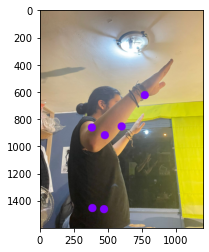

In [34]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
image_name = 'image_2.jpeg'

with mp_pose.Pose(static_image_mode = True) as pose:

    image = cv2.imread(image_name)
    height, width, _ = image.shape
    image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

    blank = cv2.imread("blank.jpg")
    blank_rgb = cv2.cvtColor(blank,cv2.COLOR_BGR2RGB)

    result = pose.process(image_rgb)
    point = Point(int(width/2),int(height/2),0)
    pose = Pose(point)
    if result.pose_landmarks is not None:                
        
        for i in key_joints_idx:
                        
            x1 = int(result.pose_landmarks.landmark[i].x*width)
            y1 = int(result.pose_landmarks.landmark[i].y*height)
            z1 = 0
            visibility = result.pose_landmarks.landmark[i].visibility
            print(total_joints[i],visibility)
            joint = Joint(x1,y1,z1,visibility, i)
            pose.add_joint(joint)
            #cv2.circle(image_rgb, (x1,y1), circle_radius, circle_color , -1)
           
        pose.add_circles(image_rgb)
        plt.imshow(image_rgb)
        

    
    for i in range(0,180):
        pose.project_pose(i)
        
    codec = cv2.VideoWriter_fourcc(*'mp4v')     
    out = cv2.VideoWriter('video1.mp4',codec, 36, (width,height))

    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()
    

